In [2]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 02.1
- Compute the following 1D integral via Monte Carlo 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$
<span style="color:red">Show a picture of both your estimations of $I$</span> and their uncertainties with a large number of *throws* $M$ (e.g. $M\ge 10^4$) as a function of the number of blocks, $N$</font>.

1. sampling a uniform distribution in $[0,1]$

In [2]:
throws, sum_prog, std  = np.loadtxt("result2.1.unif.csv", delimiter=",", unpack='true', skiprows=1)

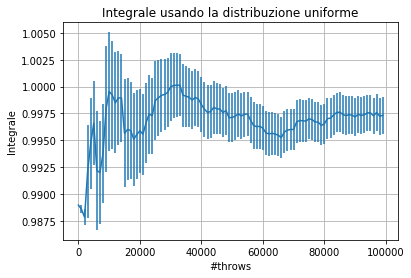

In [3]:
plt.errorbar(throws,sum_prog,yerr=std)
plt.title("Integrale usando la distribuzione uniforme")
plt.xlabel('#throws')
plt.ylabel('Integrale')
plt.grid(True)
plt.show()

2. using importance sampling (i.e. sampling a non-uniform probability in $[0,1]$)


In [16]:
throws, sum_prog, std  = np.loadtxt("result2.1.imp_sampling.csv", delimiter=",", unpack='true', skiprows=1)

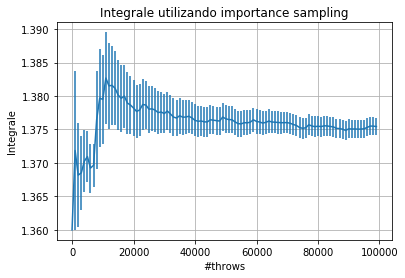

In [17]:
plt.errorbar(throws,sum_prog,yerr=std)
plt.title("Integrale utilizando importance sampling")
plt.xlabel('#throws')
plt.ylabel('Integrale')
plt.grid(True)
plt.show()

### Exercise 02.2
- <span style="color:red">3D Random Walks (RW) on a cubic lattice and in the continuum:</span> Repeat many times (e.g. say $10^4$) the simulation of a random walk in 3D always starting at the origin. Show a picture of $\langle |\vec{r}_N| \rangle_{RW}$ for both RWs</span>, with their statistical uncertainties, as function of the step $i\in [0,10^2]$.

Note that you could try to fit both results with a function like $f(N)=k\sqrt{N}$. Do your results indicate a diffusive behavior?

1. on a cubic lattice with lattice constant $a=1$; at each discrete time the walker makes a forward or backward step of length equal to $a$ in one of the 3 principal directions of the lattice: $x$, $y$ or $z$



In [6]:
from scipy.optimize import curve_fit

def f(N,k):  # defining the fitting function
    return k*np.sqrt(N)

In [7]:
step, sum_prog, std  = np.loadtxt("result2.2.discrete.csv", delimiter=",", unpack='true', skiprows=1)

    k  = 0.624311355335958
std(k) = 0.001044581419778465


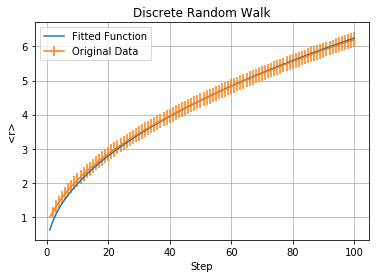

In [8]:
p_opt, p_cov = curve_fit(f, step, sum_prog, bounds=([.5],[1]))
y_fit = f(step,p_opt[0])


plt.plot(step,y_fit, label="Fitted Function") # plotting fitted function
plt.errorbar(step,sum_prog,yerr=std, label="Original Data")
plt.title("Discrete Random Walk")
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(True)
plt.legend()

print("    k  = " + str(p_opt[0]))
print("std(k) = " + str(np.sqrt(np.diagonal(p_cov))[0]))

plt.show()

2. in the continuum; at each discrete time the walker makes a step of length equal to $a(=1)$ along a **random direction** obtained by sampling **uniformly** the solid angle: $\theta \in [0,\pi]$ and $\phi \in [0,2\pi]$

In [9]:
step, sum_prog, std  = np.loadtxt("result2.2.continuous.csv", delimiter=",", unpack='true', skiprows=1)

    k  = 0.6185611728919006
std(k) = 0.0011207726883336205


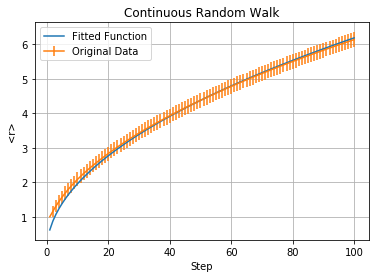

In [11]:
p_opt, p_cov = curve_fit(f, step, sum_prog, bounds=([.5],[1]))
y_fit = f(step,p_opt[0])


plt.plot(step,y_fit, label="Fitted Function") # plotting fitted function
plt.errorbar(step,sum_prog,yerr=std, label="Original Data")
plt.title("Continuous Random Walk")
plt.xlabel('Step')
plt.ylabel('<r>')
plt.grid(True)
plt.legend()

print("    k  = " + str(p_opt[0]))
print("std(k) = " + str(np.sqrt(np.diagonal(p_cov))[0]))

plt.show()

### It can be seen that both models expose a diffusive behaviour, expanding outwards (in average) from the origin.